# Example of Using Pillow

Pillow is an fork of PIL - the Python Imaging Library. PIL has been abandoned, but Pillow resurected and has improved on it. There are better libraries for serious image processing, such as OpenCV, but it is trivial to use Pillow to open an image, parse it, and run a few simple operations. I like it when I want to implement my own algorithms - mostly to learn, not for production use. It is trivial to put into an NumPy array, save in a variety of formats, and plot via Matplotlib. 

These examples, with no description or comment, serve to remind me how to do various things. I suppose if I ever write anything more it might help you, too....

Find Pillow and documentation here:
https://python-pillow.github.io/
http://pillow.readthedocs.org/

In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 8, 8

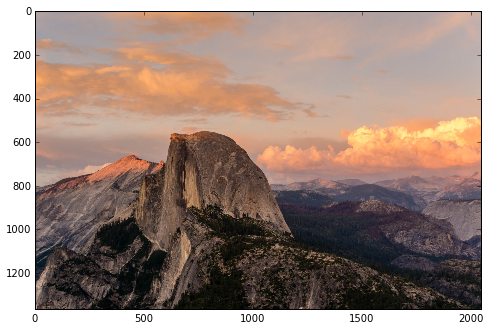

In [2]:
pl_img = Image.open('1.jpg')
plt.imshow(np.array(pl_img));

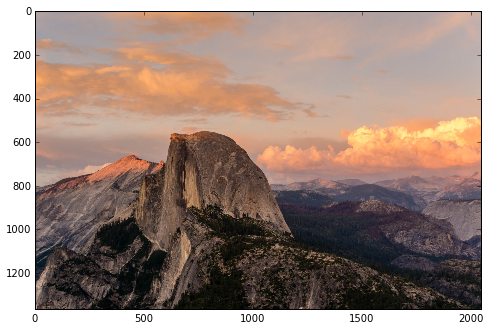

In [3]:
def plot(img, **kwargs):
    plt.imshow(np.asarray(img), **kwargs)
    
plot(pl_img)

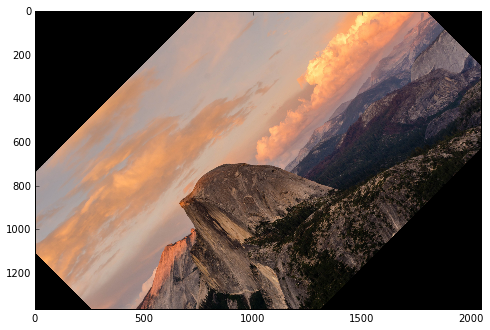

In [4]:
plot(pl_img.rotate(45))

In [5]:
img = np.array(pl_img)
print(img.shape, img.dtype)

(1365, 2048, 3) uint8


In [6]:
a = img.flatten()
a[2::3]

array([163, 163, 164, ...,  86,  94,  89], dtype=uint8)

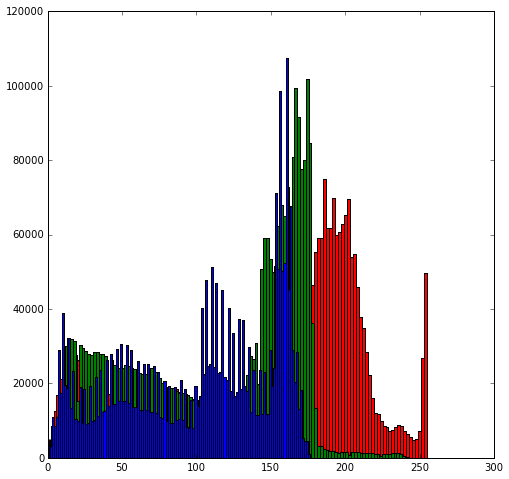

In [7]:
plt.hist(img.flatten()[0::3], 128, color='r');
plt.hist(img.flatten()[1::3], 128, color='g');
plt.hist(img.flatten()[2::3], 128, color='b');

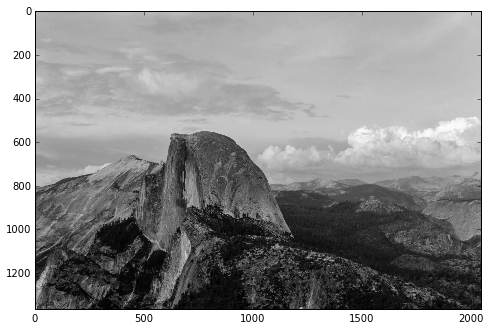

In [8]:
gray = np.array(pl_img.convert('L'))
plt.gray()
plot(gray)

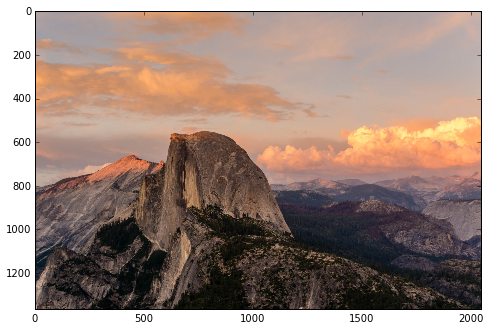

In [9]:
plot(pl_img)

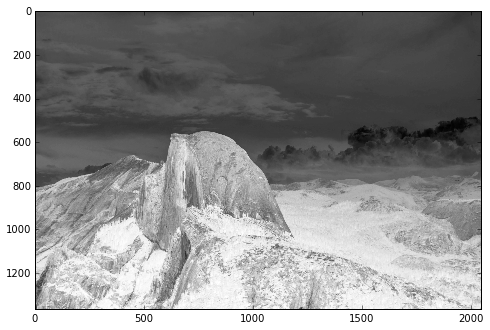

In [10]:
# invert image
plot(255 - gray)

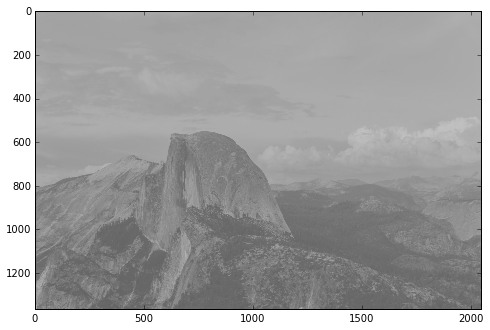

In [11]:
import matplotlib.colors as colors
# clamp between 100,200
plot(gray* (100./255) + 100, norm=colors.Normalize(0, 255));

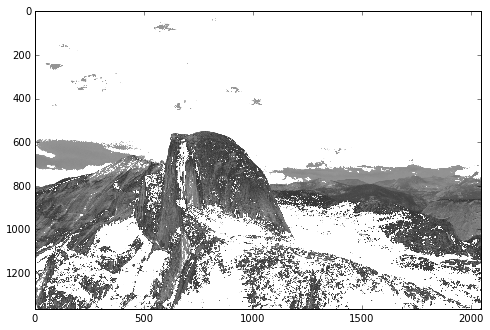

In [12]:
clamp = gray.copy()
clamp[clamp < 50] = 255
clamp[clamp > 150] = 255
plot(clamp, norm=colors.Normalize(0, 255))

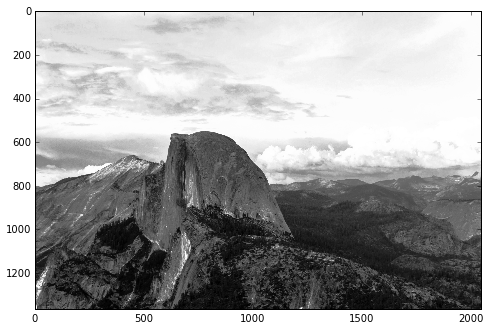

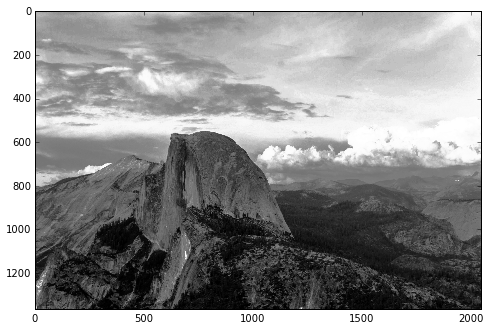

In [13]:
def histogram_eq(img, bins=256):
    flat = img.flatten()
    hist, bins = np.histogram(flat, bins, normed=True)
    cdf = hist.cumsum()
    cdf = 255*cdf / cdf[-1]
    im = np.interp(flat, bins[:-1], cdf)
    return im.reshape(img.shape)

plot(histogram_eq(gray, 12))
plt.figure()
plot(histogram_eq(gray, 256))   

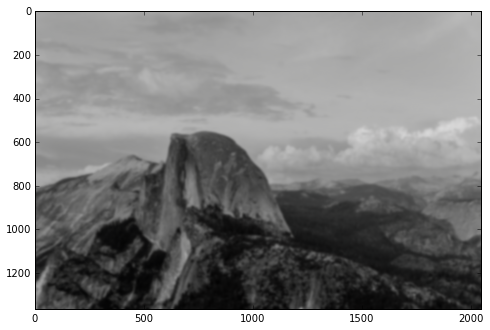

In [14]:
from scipy.ndimage import filters

im = filters.gaussian_filter(img, sigma=5)
plot(im)

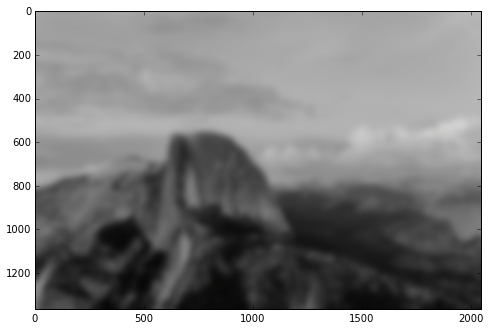

In [15]:
plot(filters.gaussian_filter(img, sigma=15))

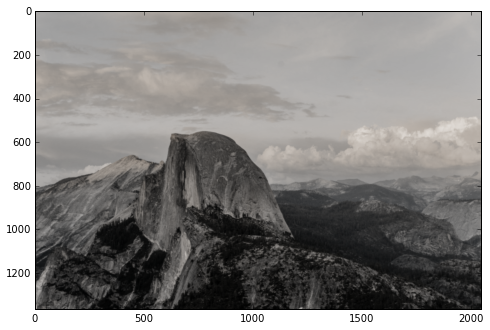

In [16]:
plot(filters.gaussian_filter(img, sigma=2))

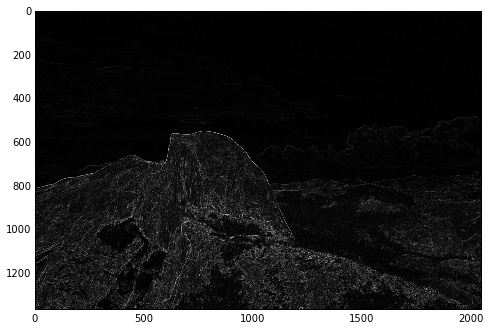

In [17]:
gray32 = gray.astype('int32')  # need higher precision
imx = filters.sobel(gray32, 1)
imy = filters.sobel(gray32, 0)
mag = np.hypot(imx, imy)
mag *= 255.0 / np.max(mag)
plot(mag)

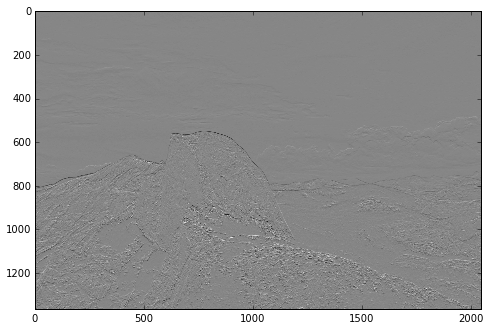

In [18]:
plot(imy)

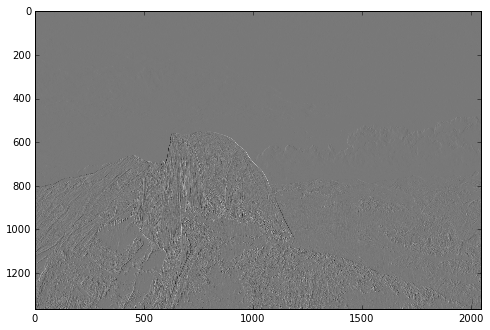

In [19]:
plot(imx)

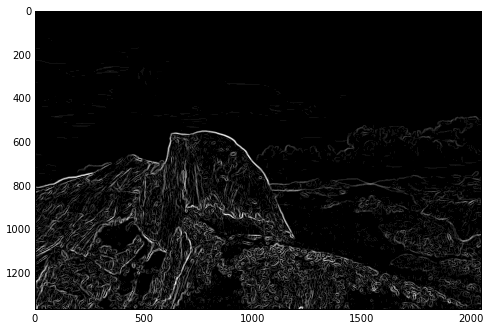

In [20]:
std = 3
imx = filters.gaussian_filter(gray32, sigma=(std, std), order=(0, 1))
imy = filters.gaussian_filter(gray32, sigma=(std, std), order=(1, 0))
mag = np.hypot(imx, imy)
#mag *= 255.0 / np.max(mag)
plot(mag)

In [21]:
from scipy.ndimage import measurements, morphology


im2=(gray<128)*1
labels, N = measurements.label(im2)
N

580

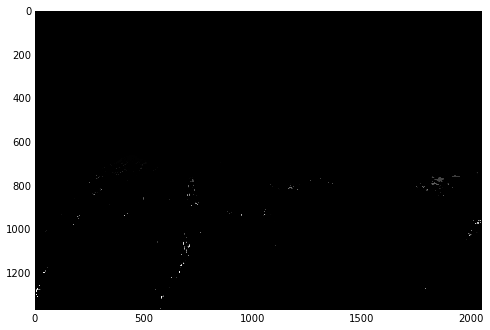

In [22]:
#labels[labels>0]=255
plot(labels)